# Female headed households in South Africa

In  this notebook we will work on the data provided by Zindi during the  competition **Women in Big Data South Africa - Women-Headed Households in South Africa**. We will create our own model to find out which features have an impact on the income of a female-headed household. 

In [10]:
# import packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import statsmodels.api as sm

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

# Loading the data
We will load the provided csv file from Zindi. In this notebook we will only work with the train data (Train.csv), as the test data (Test.csv) has no target variable and we can't evaluate our predictions. Additionally we will also load the file with the descriptions of the features (descriptions.csv).

In [68]:
# import data
df = pd.read_csv('data/Train.csv')
df.head()

ward  total_households  total_individuals     target     dw_00  \
0  41601001: Ward 1        1674.45058         5888.20750  16.773757  0.933841   
1  41601002: Ward 2        1736.99230         6735.33812  21.496661  0.696940   
2  41601003: Ward 3        2403.57591         7273.04995  10.931425  0.810545   
3  41601004: Ward 4        1740.78737         5734.49046  23.119257  0.659914   
4  41601005: Ward 5        1730.51451         6657.23835  13.652252  0.950575   

      dw_01     dw_02     dw_03     dw_04     dw_05  ...     pw_03     pw_04  \
0  0.000846  0.005490  0.000676  0.000000  0.001372  ...  0.002848  0.007537   
1  0.001253  0.004402  0.000000  0.002301  0.001323  ...  0.014566  0.057127   
2  0.004517  0.008891  0.003986  0.007735  0.000956  ...  0.057560  0.010358   
3  0.000000  0.006129  0.000000  0.000813  0.037245  ...  0.000000  0.000669   
4  0.000655  0.001473  0.000598  0.006999  0.000818  ...  0.004859  0.001290   

      pw_05     pw_06  pw_07  pw_08  ADM4_PCODE        lat        lon  \
0  0.000000  0.012928      0      0   ZA4161001 -29.682270  24.734743   
1  0.019092  0.004131      0      0   ZA4161002 -29.119311  24.757737   
2  0.001421  0.040881      0      0   ZA4161003 -29.142276  25.094093   
3  0.000000  0.005011      0      0   ZA4161004 -29.372052  24.942867   
4  0.000673  0.017629      0      0   ZA4161005 -29.409381  25.290165   

         NL  
0  0.292039  
1  3.207775  
2  0.000000  
3  2.038778  
4  0.000000  

[5 rows x 63 columns]

In [12]:
# get some general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

In [13]:
# check for null values
df.isnull().sum().sort_values(ascending=False)

ward      0
pg_03     0
lan_05    0
lan_06    0
lan_07    0
         ..
car_01    0
lln_00    0
lln_01    0
lan_00    0
NL        0
Length: 63, dtype: int64

In [14]:
# get a statistical overview of the dataframe
df.describe()

total_households  total_individuals       target        dw_00  \
count       2822.000000        2822.000000  2822.000000  2822.000000   
mean        3665.281214       12869.130053    24.507554     0.712196   
std         3266.364522        9696.690518    10.294387     0.214035   
min            1.000000         402.000000     0.000000     0.000000   
25%         1778.858235        7071.205695    16.751556     0.594212   
50%         2398.249935        9366.989680    24.156670     0.766841   
75%         3987.080563       14241.233015    32.226553     0.881708   
max        39684.942130       91716.746370    55.528423     0.994962   

             dw_01        dw_02        dw_03        dw_04        dw_05  \
count  2822.000000  2822.000000  2822.000000  2822.000000  2822.000000   
mean      0.092616     0.032043     0.006057     0.008665     0.006289   
std       0.182852     0.080253     0.019374     0.030697     0.024606   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002895     0.002407     0.000000     0.000000     0.000000   
50%       0.010425     0.005762     0.000807     0.000607     0.000865   
75%       0.068209     0.027913     0.002538     0.002225     0.003027   
max       0.931490     0.951806     0.264239     0.392085     0.435912   

             dw_06  ...        pw_02        pw_03        pw_04        pw_05  \
count  2822.000000  ...  2822.000000  2822.000000  2822.000000  2822.000000   
mean      0.022375  ...     0.127555     0.041589     0.019655     0.011008   
std       0.037127  ...     0.156400     0.057331     0.032926     0.023672   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.002716  ...     0.008673     0.002099     0.000715     0.000159   
50%       0.008639  ...     0.069065     0.016496     0.005164     0.001459   
75%       0.025218  ...     0.183384     0.058626     0.025055     0.009432   
max       0.412936  ...     1.000000     0.327393     0.306787     0.228261   

             pw_06   pw_07   pw_08          lat          lon           NL  
count  2822.000000  2822.0  2822.0  2822.000000  2822.000000  2822.000000  
mean      0.110818     0.0     0.0   -26.880740    28.666515    17.437560  
std       0.185401     0.0     0.0     2.021279     2.373809    18.958621  
min       0.000000     0.0     0.0   -32.490089    16.760022     0.000000  
25%       0.005217     0.0     0.0   -28.569019    27.707932     3.033397  
50%       0.025165     0.0     0.0   -26.549866    28.959679     9.205572  
75%       0.116638     0.0     0.0   -25.572130    30.441505    26.890531  
max       0.961523     0.0     0.0   -22.331267    32.858249    63.000000  

[8 rows x 61 columns]

In [15]:
# check for columns with single values
df.nunique().sort_values().head(10)

dw_13        1
lan_13       1
dw_12        1
pw_08        1
pw_07        1
lan_14    1459
dw_10     1695
dw_04     1799
dw_05     1952
dw_03     2094
dtype: int64

In [16]:
# print the columns with single values for a visual check
df[['dw_13', 'lan_13', 'dw_12', 'pw_08', 'pw_07']]

dw_13  lan_13  dw_12  pw_08  pw_07
0         0       0      0      0      0
1         0       0      0      0      0
2         0       0      0      0      0
3         0       0      0      0      0
4         0       0      0      0      0
...     ...     ...    ...    ...    ...
2817      0       0      0      0      0
2818      0       0      0      0      0
2819      0       0      0      0      0
2820      0       0      0      0      0
2821      0       0      0      0      0

[2822 rows x 5 columns]

The columns ['dw_13', 'lan_13', 'dw_12', 'pw_08', 'pw_07'] have only 0 in them --> we could drop these features

In [17]:
# drop features with only 0 in them
df = df.drop(['dw_13', 'lan_13', 'dw_12', 'pw_08', 'pw_07'], axis=1)

In [18]:
# check new dataframe after dropping the features with only 0 in them
df.shape

(2822, 58)

In [19]:
# load the description file and have a look at them
var_desc = pd.read_csv('data/variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

Column  \
0        dw_00   
1        dw_01   
2        dw_02   
3        dw_03   
4        dw_04   
5        dw_05   
6        dw_06   
7        dw_07   
8        dw_08   
9        dw_09   
10       dw_10   
11       dw_11   
12       dw_12   
13       dw_13   
14      psa_00   
15      psa_01   
16      psa_02   
17      psa_03   
18      psa_04   
19      stv_00   
20      stv_01   
21      car_00   
22      car_01   
23      lln_00   
24      lln_01   
25      lan_00   
26      lan_01   
27      lan_02   
28      lan_03   
29      lan_04   
30      lan_05   
31      lan_06   
32      lan_07   
33      lan_08   
34      lan_09   
35      lan_10   
36      lan_11   
37      lan_12   
38      lan_13   
39      lan_14   
40       pg_00   
41       pg_01   
42       pg_02   
43       pg_03   
44       pg_04   
45      lgt_00   
46       pw_00   
47       pw_01   
48       pw_02   
49       pw_03   
50       pw_04   
51       pw_05   
52       pw_06   
53       pw_07   
54       pw_08   
55  ADM4_PCODE   
56         lat   
57         lon   
58          NL   
59      target   

                                                                                                                                    Description  \
0                             Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm   
1                                             Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials   
2                                                                        Percentage of dwellings of type: Flat or apartment in a block of flats   
3                                                                                     Percentage of dwellings of type: Cluster house in complex   
4                                                                 Percentage of dwellings of type: Townhouse (semi-detached house in a complex)   
5                                                                                          Percentage of dwellings of type: Semi-detached house   
6                                                                                  Percentage of dwellings of type: House/flat/room in backyard   
7                                                                                     Percentage of dwellings of type: Informal dwelling (shack   
8                                                                                     Percentage of dwellings of type: Informal dwelling (shack   
9                                  Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat   
10                                                                                                Percentage of dwellings of type: Caravan/tent   
11                                                                                                       Percentage of dwellings of type: Other   
12                                                                                                 Percentage of dwellings of type: Unspecified   
13                                                                                              Percentage of dwellings of type: Not applicable   
14                                                                                        Percentage listing present school attendance as:  Yes   
15                                                                                         Percentage listing present school attendance as:  No   
16                                                                                Percentage listing present school attendance as:  Do not know   
17                                                                                Percentage listing present school attendance as:  Unspecified   
18                                                                             Percentage listing present school att

# Quick EDA
Before we dive into modelling, let's take a quick look at the data and see what we have to work with. 

## Looking at the target variable
The purpose of this project is to predict the percentage of households in a ward that are woman-headed and have an annual household income of <R19,600. To put that in context, that's less than 250USD per month. 

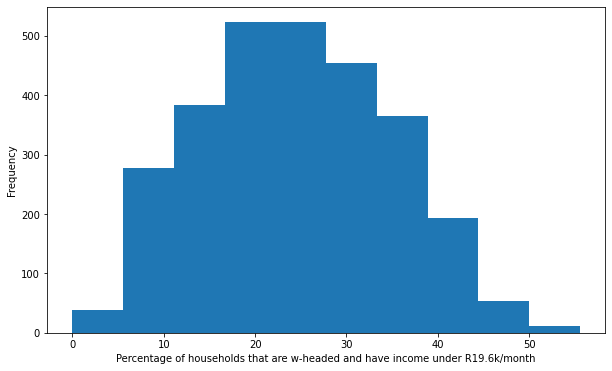

In [20]:
# Plot the distribution
ax = df['target'].plot(kind='hist')
plt.xlabel('Percentage of households that are w-headed and have income under R19.6k/month');

# Looking at a few interesting correlations

In [21]:
# Strong +ve correlations
df.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [22]:
# And negative correlations
df.corr()['target'].sort_values().head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

In [23]:
# create a list of positive and negative correlated features above a treshold of |0.5|
# negatively correlated features (- 0.5 threshold)
list1 = list((df.corr()['target'].sort_values().head(8)).index)
# positively correlated features (+ 0.5 threshold)
list2 = list((df.corr()['target'].sort_values(ascending=False).iloc[1:6]).index)
# list2 = list((df.corr()['target'].sort_values(ascending=False).head(6)).index)
# combine both lists
corr_feature_list = list1 + list2
corr_feature_list

['pw_00',
 'psa_01',
 'car_00',
 'stv_00',
 'lln_00',
 'pg_03',
 'NL',
 'lan_00',
 'psa_00',
 'car_01',
 'stv_01',
 'lln_01',
 'pg_00']

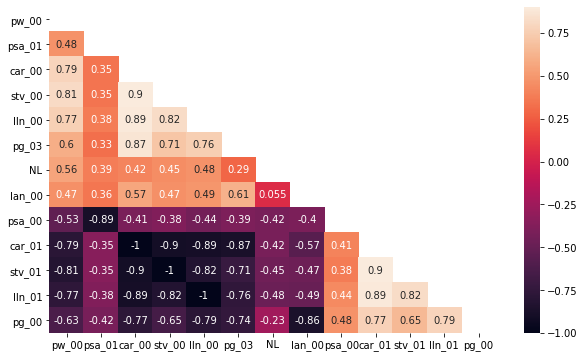

In [24]:
# plot the list of highly correlated features
corr = df[corr_feature_list].corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix);

Car00 and Car01 / Stv00 and Stv01 / Lln00 and Lln01 perfectly correlated (- 1) --> we can remove them

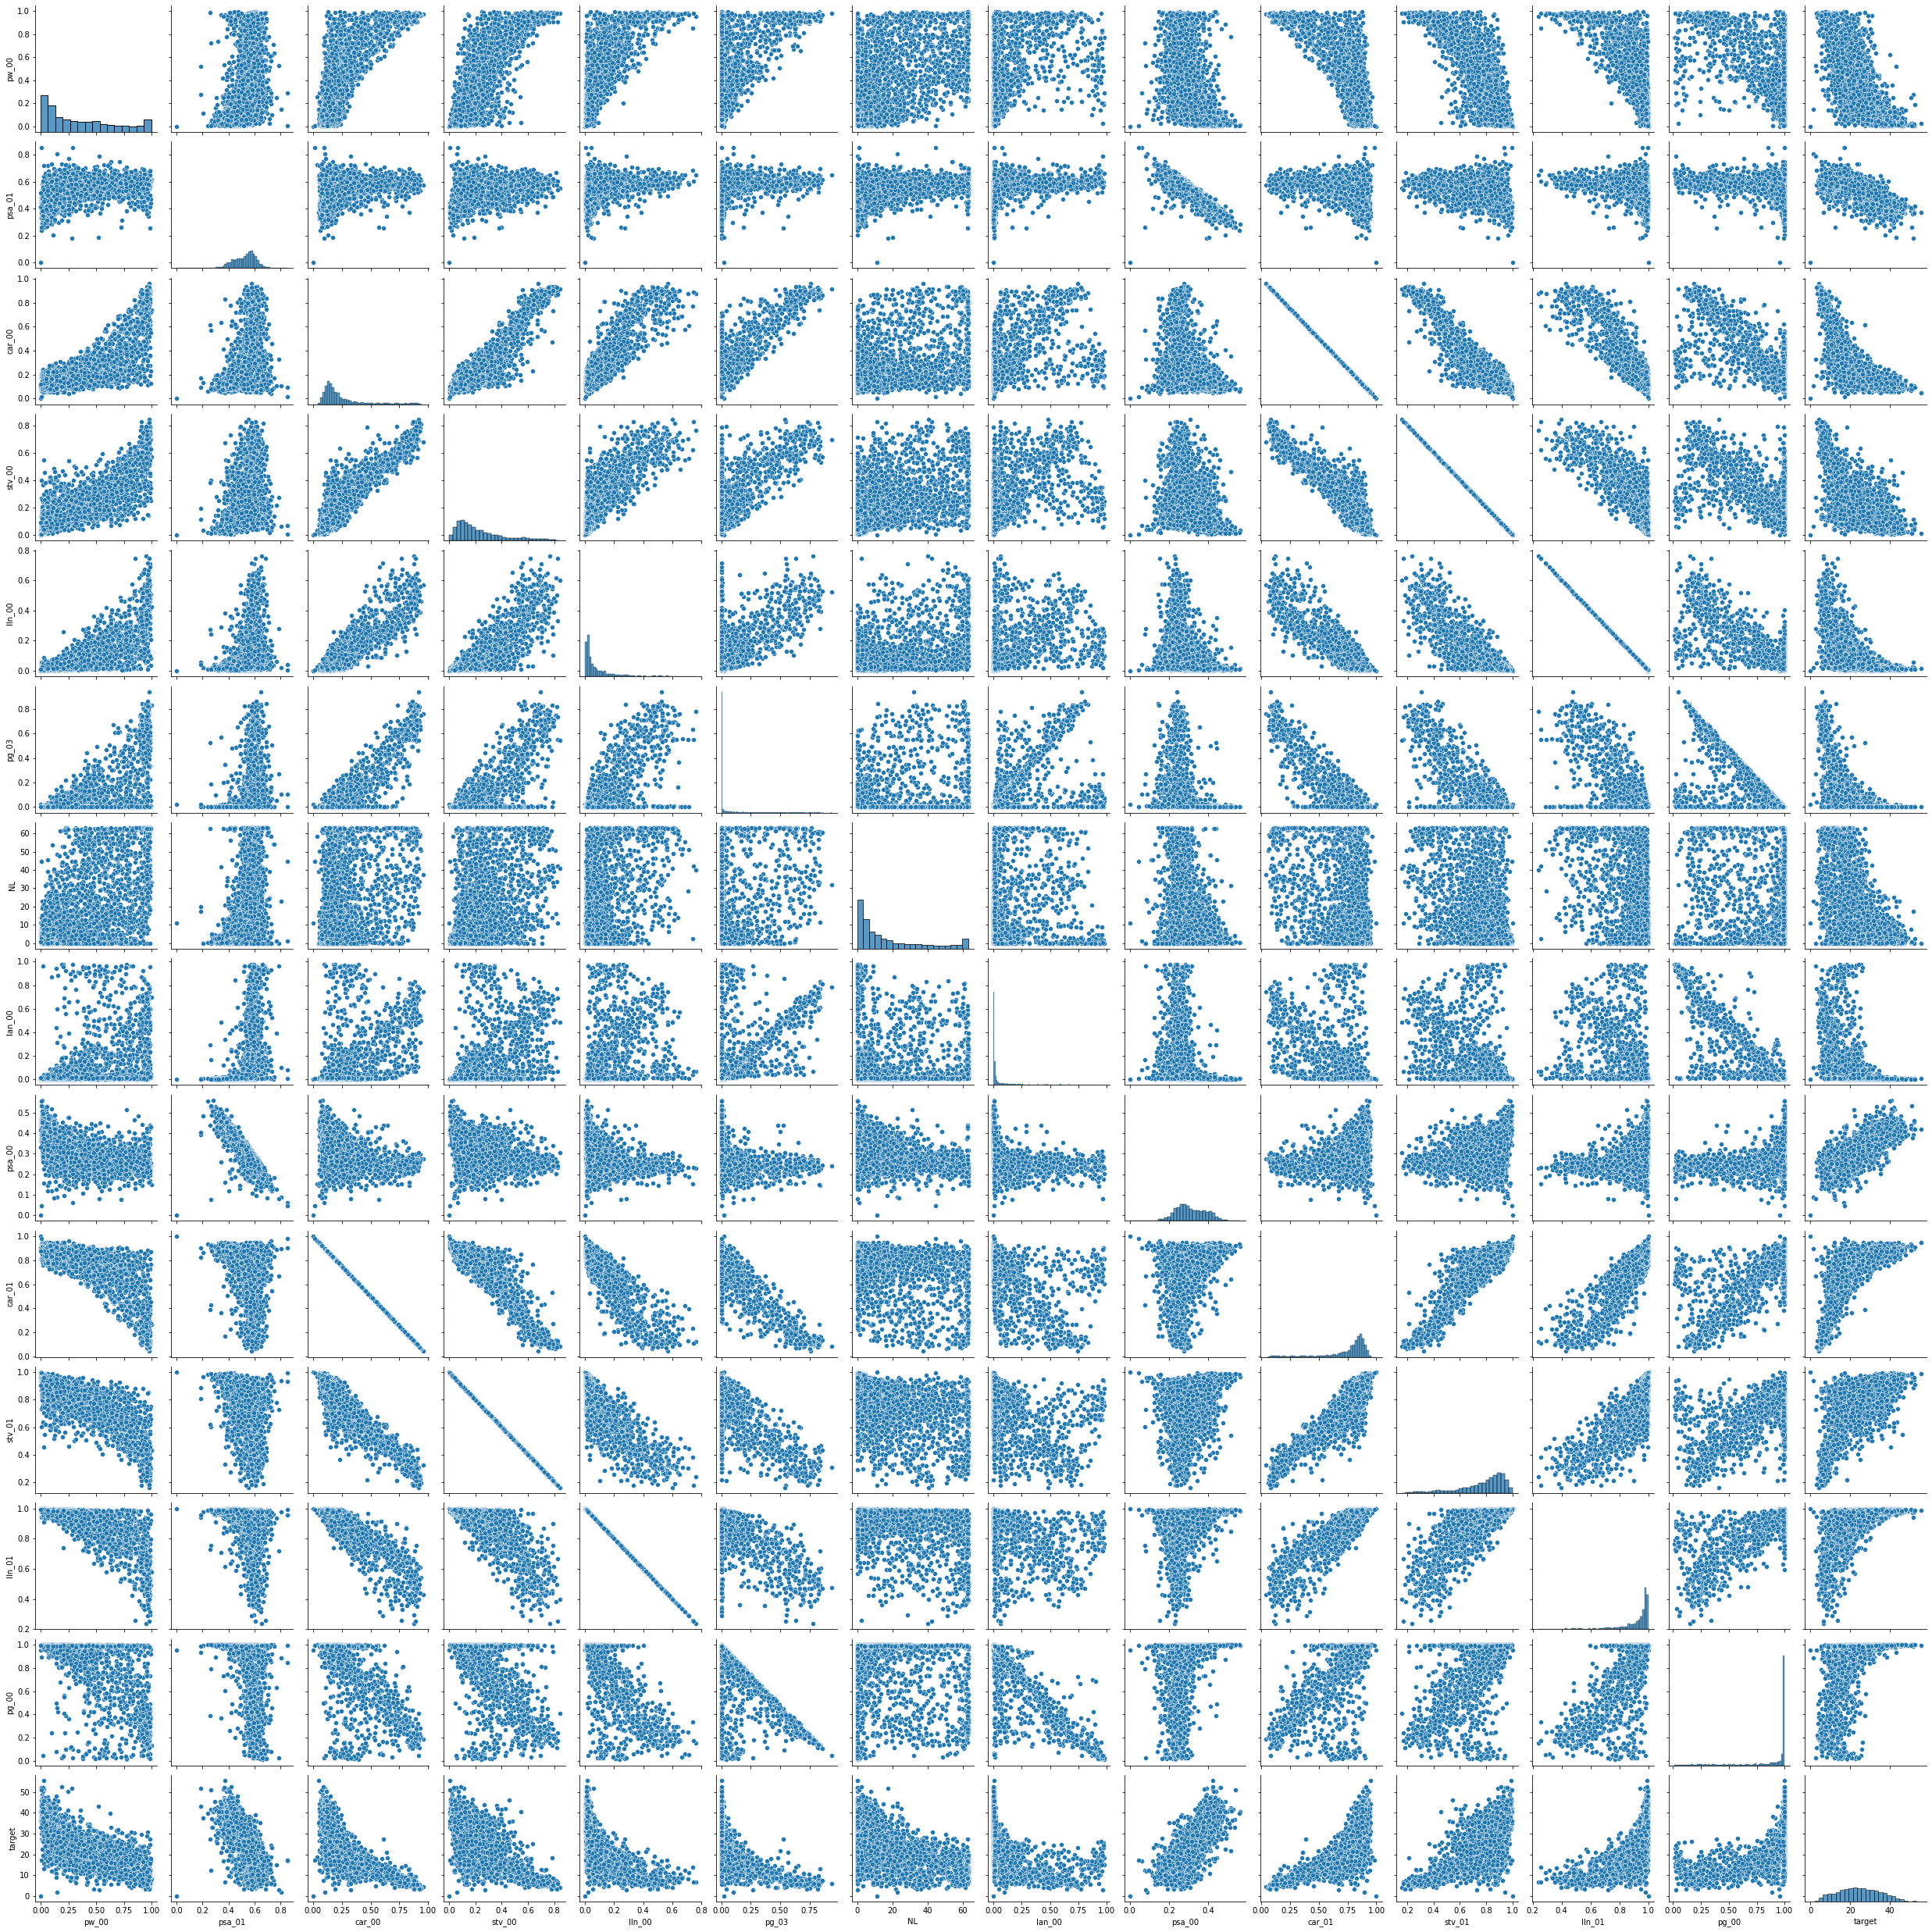

In [25]:
# create a pairplot
corr_feature_list = corr_feature_list + ['target']
sns.pairplot(data=df[corr_feature_list]);

<AxesSubplot:xlabel='car_00', ylabel='target'>

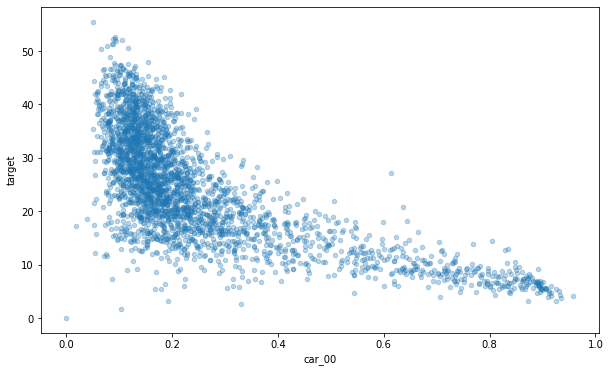

In [47]:
# investigate interesting correlations
# households with a car
df.plot(x='car_00', y='target', kind='scatter', alpha=0.3)


In [48]:
# after investigating the correlated features, we will further reduce them:
#reduced_feature_list = ['pw_00', 'psa_01', 'car_00', 'pg_03', 'NL', 'lan_00', 'psa_00', 'pg_00', 'target'] %ravi : I have also removed 'psa_00' as its simply opposit of ''psa_00
reduced_feature_list = ['pw_00', 'psa_00', 'car_00', 'pg_03', 'NL', 'lan_00', 'pg_00', 'target']

df_reduced = df[reduced_feature_list]

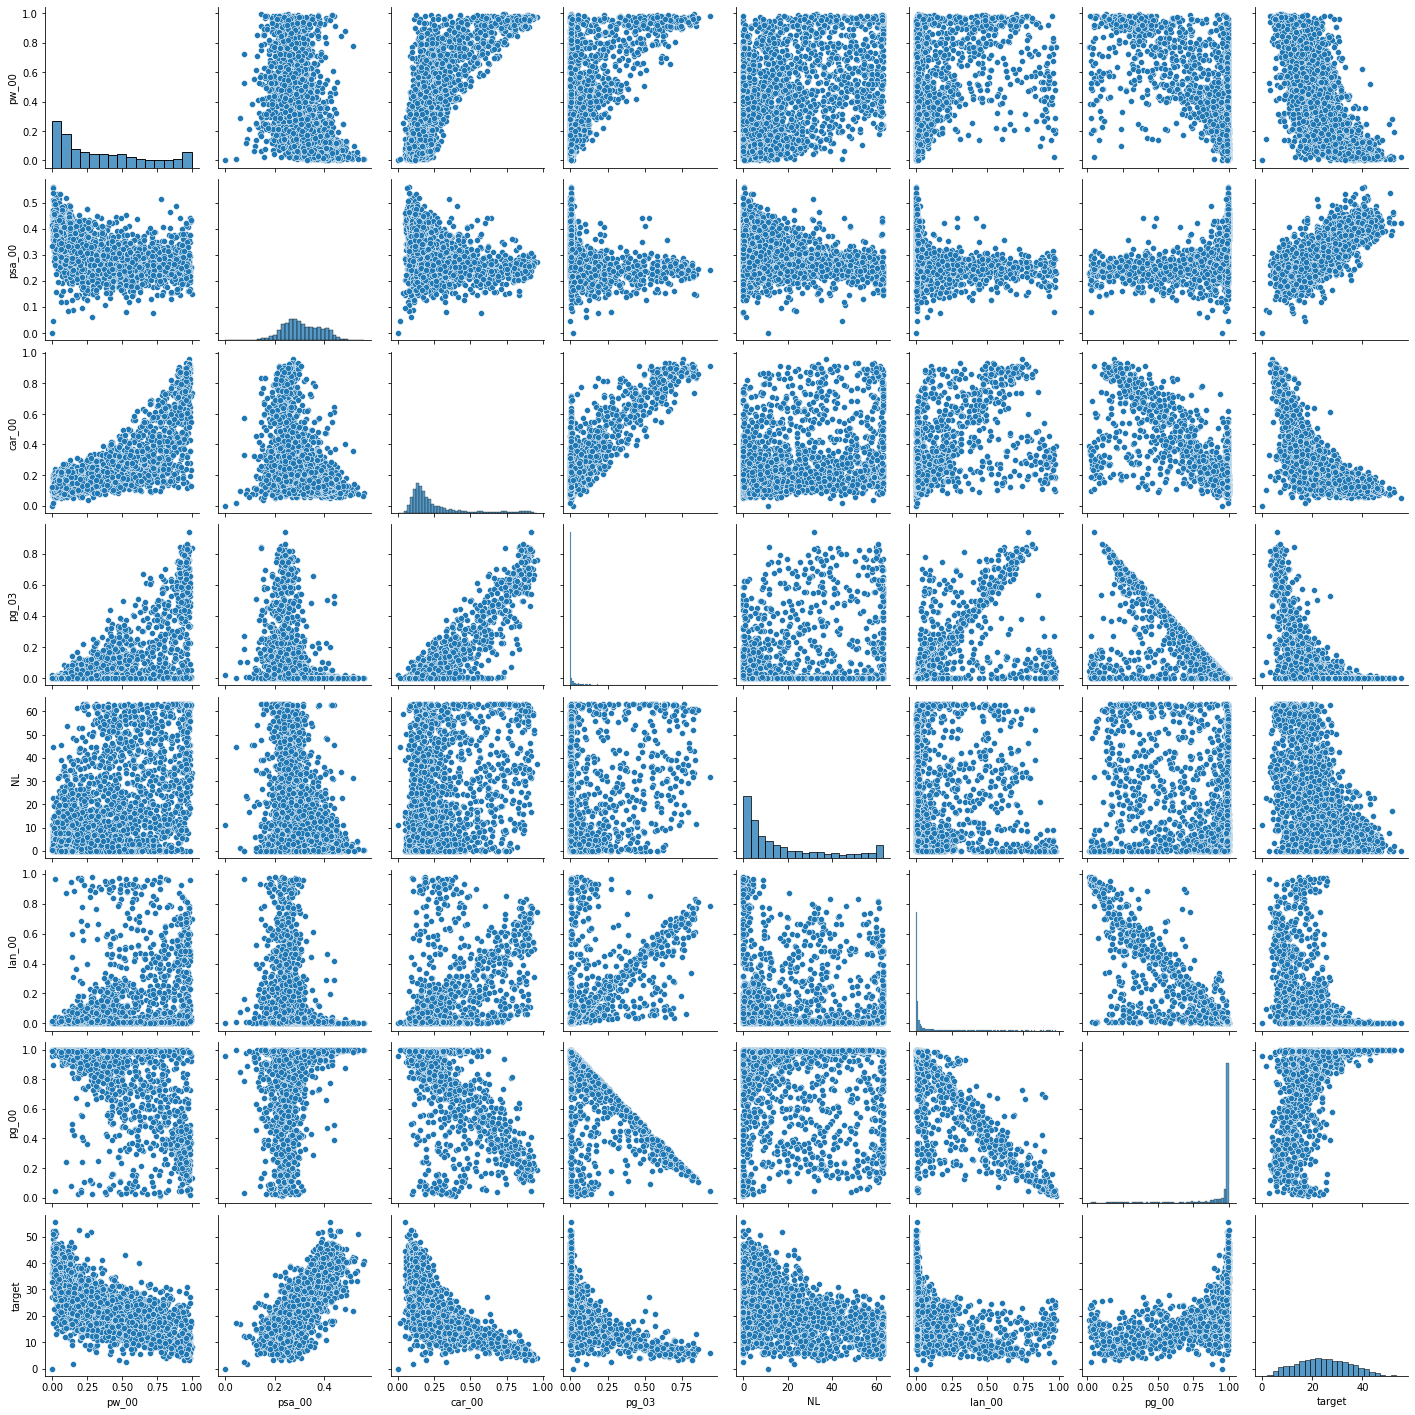

In [49]:
# plot a pairplot for the reduced list of features
sns.pairplot(df_reduced);

## Transformation

In [50]:
# write function to transform features with boxcox
def convert_zeros(x):
    '''
    function to convert zeros to a postive number 
    so that it can be transformed with the boxcox'''
    if x == 0.0:
        return 0.0000001
    else :
        return x
    


In [51]:
# check for 0 before and convert them
print (df['pw_00'].isin([0]).sum())
print(df['pw_00'].apply(convert_zeros).isin([0]).sum())

1
0


/var/folders/8j/mj8c2cg9517b0ht89l57gj9m0000gn/T/ipykernel_89170/3605700561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col] = df_reduced[col].apply(convert_zeros)
/var/folders/8j/mj8c2cg9517b0ht89l57gj9m0000gn/T/ipykernel_89170/3605700561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col] = df_reduced[col].apply(convert_zeros)
/var/folders/8j/mj8c2cg9517b0ht89l57gj9m0000gn/T/ipykernel_89170/3605700561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

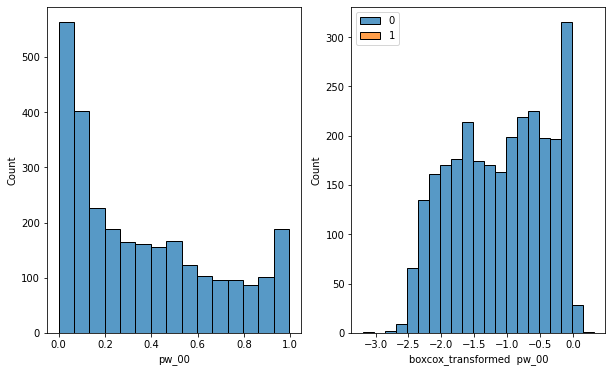

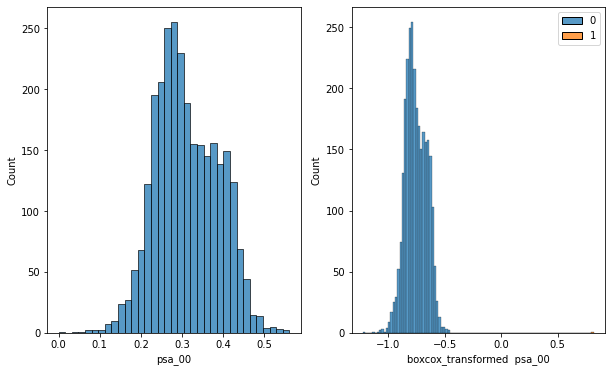

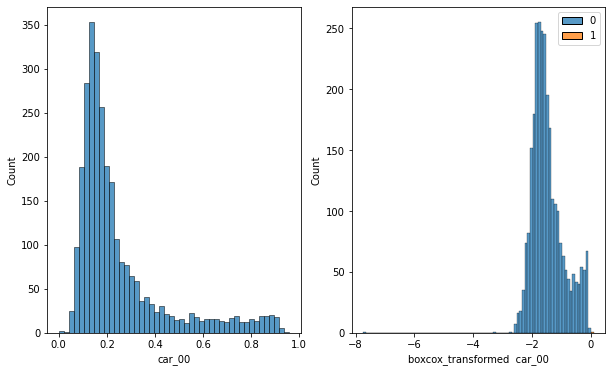

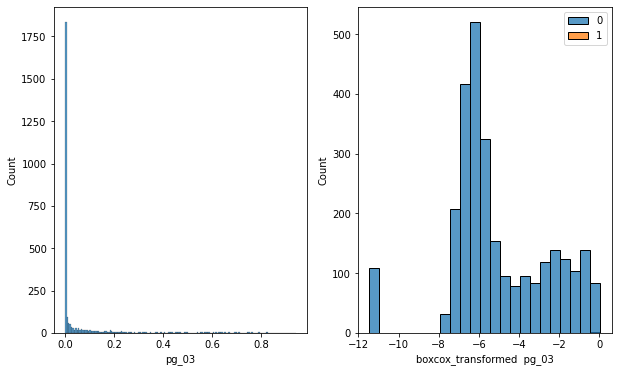

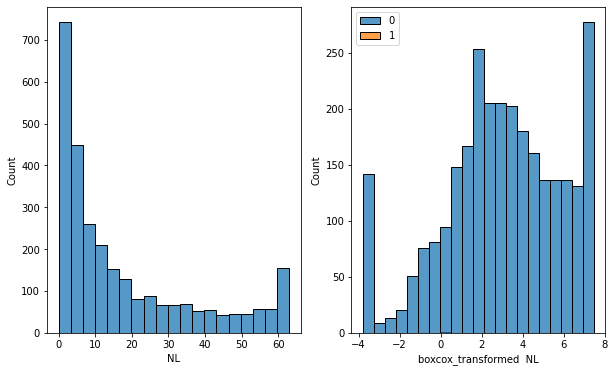

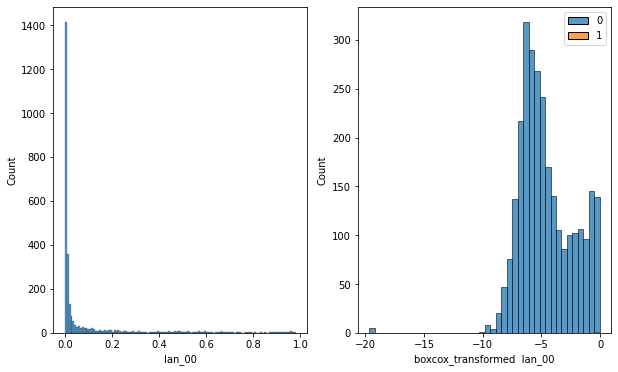

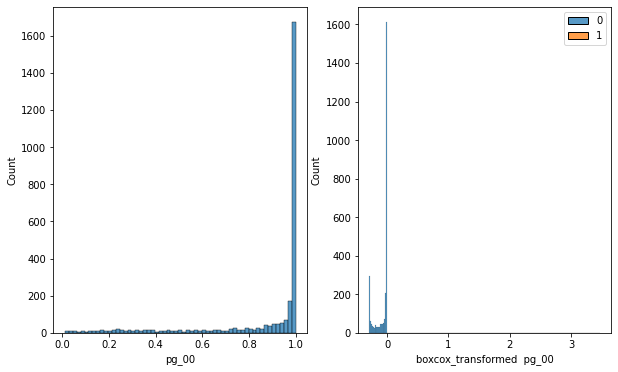

In [52]:
# plot transformed features
for col in reduced_feature_list:
    if col != 'target':
        fig, axes = plt.subplots(1,2)
        df_reduced[col] = df_reduced[col].apply(convert_zeros)
        sns.histplot(df_reduced[col], ax=axes[0])
        plt.xlabel(col)
        sns.histplot(boxcox(df_reduced[col]), ax=axes[1])
        plt.xlabel('boxcox_transformed  ' + col)

# Baseline Model

As a starter we will create a baseline model to get an idea how a more complex model could look like.

In [37]:
# Get a very reduced dataframe for the baseline model
# we choose the highly correlated variable school attendance = yes (psa_00) for our baseline model 
df_base = df[['psa_00', 'target']]
df_base.head()

psa_00     target
0  0.260191  16.773757
1  0.290228  21.496661
2  0.186435  10.931425
3  0.281229  23.119257
4  0.196687  13.652252

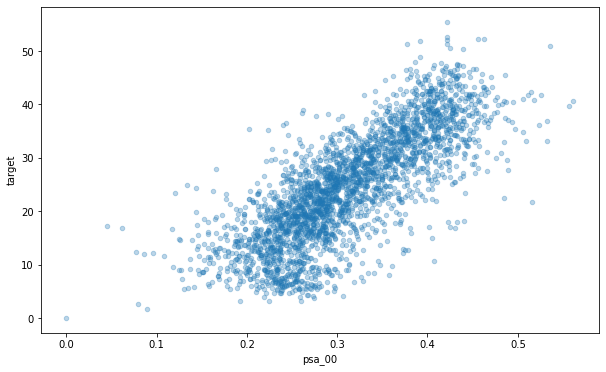

In [38]:
# plot the baseline model
df_base.plot(x='psa_00', y='target', kind='scatter', alpha=0.3);

## Modelling the baseline model
Before we go deeper, we will build a quick model FIRST, to see a baseline to compare to. So, in this section we'll try a simple linear model based on only one highly correlated feature. 

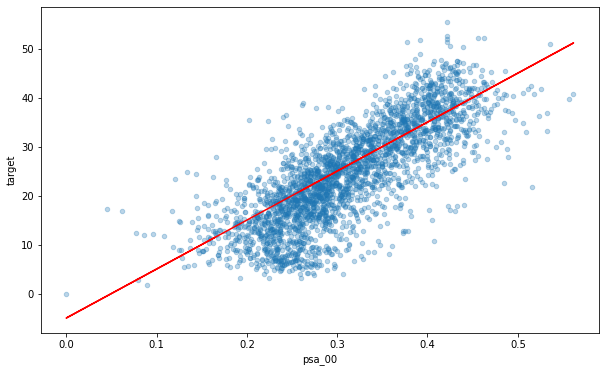

In [39]:
# Modelling by hand: regression line formula

# as we can see from the scatter plot, a line would run through (0 | -5), we only need a slope
# points would be: (0.2 | 10), (0.3 | 20) --> the slope is 100
# y = 100 * x -5

# put this line in the plot:
x = df_base['psa_00']
y = 100 * x - 5

df_base.plot(x='psa_00', y='target', kind='scatter', alpha=0.3)
plt.plot(x, y, '-r', label='y = 100 * x')
plt.show();

### Evaluating Predictions

We can evaluate our predictions with the "R-Squared Score", which is a measure of how well our model explains the variation in the target variable. The closer to 1, the better. 

In [60]:
from sklearn import metrics

In [63]:
# try to calculate RMSE for this line:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(df_base['target'], y)

rmse = math.sqrt(mse)

print("RMSE of baseline model:", round(rmse, 2))
print("Error in % of baseline model:", round((rmse/np.average(y))*100, 2))
print("Mean of the target:", round(np.average(y), 2))
print("Standard deviation of the target:", round(np.std(y), 2))

RMSE of baseline model: 6.62
Error in % of baseline model: 25.35
Mean of the target: 26.13
Standard deviation of the target: 7.66


In [ ]:
# Do the same, only not with formula by ourselves, but with proper linear regression

import statsmodels.api as sms

# Prepare data for modeling
# Choose the predictor and add a constant term
X = df_base[['psa_00']]
y = df_base['target']
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)
display(X.head())
display(y.head())

In [ ]:
# Create an OLS model
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

For this linear regression model, our RMSE would be much improved!

In [ ]:
# The formula would be: y = -8.2131 + 105.1205 * x
# Plot this in comparison

x_lin = df_base['psa_00']
y_lin = -8.2131 + 105.1205 * x_lin
df_base.plot(x='psa_00', y='target', kind='scatter', alpha=0.3)
plt.plot(x_lin, y_lin, '-r', label='y = 100 * x')
plt.show();

In [ ]:
# print metrics for linear regression model

mse_lin = sklearn.metrics.mean_squared_error(df_base['target'], y_lin)

rmse_lin = math.sqrt(mse_lin)

print("RMSE of Linear Regression model:", round(rmse_lin, 2))
print("Error in % of Linear Regression model:", round((rmse_lin/np.average(y))*100, 2))
print("Mean of the target:", round(np.average(y), 2))
print("Standard deviation of the target:", round(np.std(y), 2))

It seems, our baseline model was nearly as good as the linear regression model.

# Feature importance

# Final Model

After trying a first very basic Baseline model, we make our model more complex and involve more features. The features were chosen after checking for correlations and feature importance.

In [69]:
# drop features
feature_list = ['pw_00', 'pw_01', 'psa_00', 'psa_01', 'car_00', 'lln_00', 'stv_00', 'pg_00', 'pg_03', 'lan_00', 'lan_01', 'target']
df_final = df[feature_list]
df_final.head()

pw_00     pw_01    psa_00    psa_01    car_00    lln_00    stv_00  \
0  0.742692  0.214027  0.260191  0.607898  0.273727  0.118825  0.283468   
1  0.309294  0.576844  0.290228  0.549788  0.144638  0.066903  0.103641   
2  0.323393  0.483376  0.186435  0.677005  0.272220  0.100009  0.165772   
3  0.677437  0.314194  0.281229  0.593281  0.127875  0.029155  0.087768   
4  0.771106  0.194743  0.196687  0.517578  0.404507  0.133552  0.345975   

      pg_00     pg_03    lan_00    lan_01     target  
0  0.357455  0.072996  0.832913  0.012336  16.773757  
1  0.698428  0.015835  0.879655  0.008445  21.496661  
2  0.672452  0.167494  0.565546  0.015991  10.931425  
3  0.728014  0.000956  0.743812  0.006530  23.119257  
4  0.753491  0.106953  0.422623  0.014352  13.652252

In [70]:
# check shape of the final dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pw_00   2822 non-null   float64
 1   pw_01   2822 non-null   float64
 2   psa_00  2822 non-null   float64
 3   psa_01  2822 non-null   float64
 4   car_00  2822 non-null   float64
 5   lln_00  2822 non-null   float64
 6   stv_00  2822 non-null   float64
 7   pg_00   2822 non-null   float64
 8   pg_03   2822 non-null   float64
 9   lan_00  2822 non-null   float64
 10  lan_01  2822 non-null   float64
 11  target  2822 non-null   float64
dtypes: float64(12)
memory usage: 264.7 KB


In [71]:
# apply the logtransformation on 

for col in feature_list:
    if col != 'target' and  col != 'psa_00' and  col != 'psa_01' and col != 'car_00' and col != 'pg_00':
        #df_final[col] = df_final[col].apply(convert_zeros)
        df_final[col] = boxcox(df_final[col])[0].reshape(-1,1);

ValueError: Data must be positive.

In [ ]:
# check data after log transformation
df_final.head()

In [ ]:
# do the cross validation manually
from sklearn.model_selection import KFold

# Using this to test a model on 5 different splits
kf = KFold(n_splits=5, shuffle=False)

ycol = 'target'
in_cols = feature_list[:-1]

scores = []
for train, test in kf.split(df_final):
  lr = LinearRegression()
  lr.fit(df_final[in_cols].iloc[train], df_final[ycol].iloc[train])
  rmse = np.sqrt(mean_squared_error(df_final[ycol].iloc[test], lr.predict(df_final[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 5-fold CV:", np.mean(scores))

In [ ]:
# Train test split with same random seed
# Defining X and y
features = df_final.columns.tolist()
features.remove('target')
X = df_final[features]
y = df_final.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150, shuffle=True)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

In [ ]:
# do the cross validation with grid search
# Grid search for Linear Regression

# Defining parameter grid (as dictionary)
param_grid = {"fit_intercept" : [True, False],
              "normalize" : [True, False]
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(LinearRegression(), param_grid, cv=5, verbose=0, n_jobs=-1)

# Fit gridsearch object to data
gs.fit(X_train, y_train)

In [ ]:
# Evaluate the model (Multiple Linear Regression) --> Grid search
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

In [ ]:
# Predict
y_pred = gs.predict(X_test)

# Evaluate the model (Multiple Linear Regression) (Grid Search)

# predicting the model fit
score = r2_score(y_test, y_pred)
print("r2 score is ", round(score, 2))
print("mean_sqrd_error is:", round(mean_squared_error(y_test, y_pred), 2))
print("root_mean_squared error is:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

In [ ]:
# Plot the errors
from yellowbrick.regressor import ResidualsPlot

#visualizer = ResidualsPlot(gs, hist=False, qqplot=True)
visualizer = ResidualsPlot(gs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()